### k-means clustering on toy dataset

Resources:

[K-means clustering on high dimensional data (Wine dataset example)](https://medium.com/swlh/k-means-clustering-on-high-dimensional-data-d2151e1a4240)
([See code](https://github.com/Shivangi0503/Wine_Clustering_KMeans/blob/main/WineClustering.py))

[Four mistakes in clustering you should avoid](https://towardsdatascience.com/common-mistakes-in-cluster-analysis-and-how-to-avoid-them-eb960116d773)

In [9]:
from sklearn.datasets import load_breast_cancer

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [31]:
cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)

Pre-processing

In [63]:
# Scaling the data (standardize the features for Euclidean distance in k-means)

#Computes mean and std for each feature
scaler = StandardScaler().fit(df.values)
#Transforms data 
scaled_data = scaler.transform(df.values)
scaled_df = pd.DataFrame(data=scaled_data, columns=df.columns)
#scaled_df['target'] = pd.Series(cancer_data.target)
scaled_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,-1.297676
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,-1.297676
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,-1.297676
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,-1.297676
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,-1.297676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,-1.297676
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,-1.297676
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,-1.297676
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,-1.297676


Data visualization/Dimensionality reduction with PCA

In [37]:
# Dimensionality reduction of data
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=pca_data, columns=['component_1', 'component_2'])

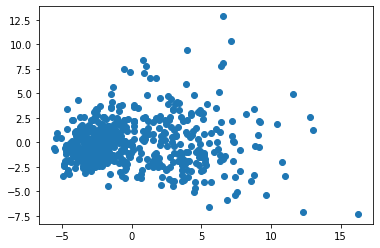

In [38]:
# Generating plot
plt.scatter('component_1', 'component_2', data=pca_df)
plt.show()

In [42]:
km = KMeans(n_clusters=2, init='random', 
            n_init=10, max_iter=300, 
            tol=0.001, random_state=0)
km.fit(pca_data)

KMeans(init='random', n_clusters=2, random_state=0, tol=0.001)

In [53]:
predictions = km.predict(pca_data)
pca_df['cluster'] = pd.Series(predictions, index=pca_df.index)

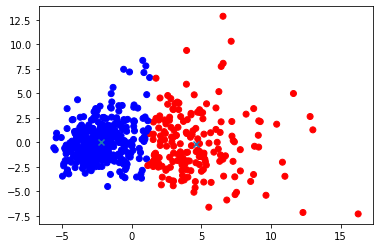

In [54]:
colors = {0: 'red', 1: 'blue'}
plt.scatter('component_1', 'component_2', data=pca_df, c=pca_df['cluster'].map(colors))
centroids = km.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x')
plt.show()